<a href="https://colab.research.google.com/github/thegrouch4413/Predictive-Analysis/blob/main/Battery_Capacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Model Fitting

Sometimes, you might not have a lot of data in order to train a sophisticated model. If you are working with continuous numerical data, you might be able to fit a curve, or a polynomial to your data in order to make more accurate predictions.

In this example, we will predict battery capacity given the voltage on the battery terminals. Terminal voltage is not linear, so we can try and fit a polynomial to a set of known data in order to make predictions.

#Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data


This data was collected from this [website](https://en.wikipedia.org/wiki/Alkaline_battery). You can also digitize images from a publication using [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/).

In [2]:
capacity = [100 - x*10 for x in range(11)]
voltage = [1.59, 1.44, 1.38, 1.34, 1.32, 1.30, 1.28, 1.26, 1.23, 1.20, 1.10]
voltage

[1.59, 1.44, 1.38, 1.34, 1.32, 1.3, 1.28, 1.26, 1.23, 1.2, 1.1]

#EDA

Text(0, 0.5, 'Voltage (V)')

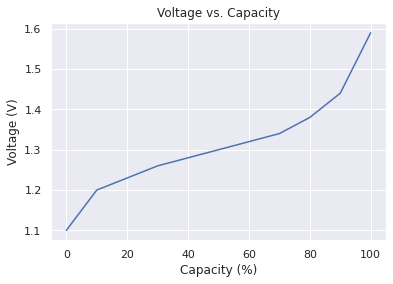

In [3]:
plt.plot(capacity, voltage)  # Piecewise #
plt.title('Voltage vs. Capacity')
plt.xlabel('Capacity (%)')
plt.ylabel('Voltage (V)')

# Polynomial Curve Model Fitting

Numpy has a convenient method to [fit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and [evaluate](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) a polynomial.

In [4]:
model = np.poly1d(np.polyfit(capacity, voltage, 7))

Text(0, 0.5, 'Voltage (V)')

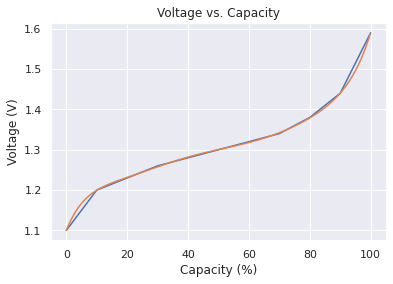

In [5]:
x = np.arange(0, 100, 0.1) # Smooth Curve #
y = model(x)
plt.plot(capacity, voltage)
plt.plot(x, y)
plt.title('Voltage vs. Capacity')
plt.xlabel('Capacity (%)')
plt.ylabel('Voltage (V)')

# Measure Accuracy

Estimate accuracy using [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error).

In [6]:
mse = np.sum((model(capacity) - voltage)**2)
mse

2.199917729329643e-05

# Predictions

Predict battery capacity by looking for the capacity closest to the measured battery voltage.

In [10]:
def tcapacity(vmeasure):
  for i in np.arange(0, 100, 0.1): # start stop step #
    if model(i) >= vmeasure:
      return i

In [11]:
tcapacity(1.5)

95.30000000000001